# -------------------------------ABC_CaseStudy---------------------------------------

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Data Cleaning
# Load data
gameplay = pd.read_excel("Analytics Position Case Study.xlsx", sheet_name="User Gameplay data", skiprows=2)
deposits = pd.read_excel("Analytics Position Case Study.xlsx", sheet_name="Deposit Data", skiprows=2)
withdrawals = pd.read_excel("Analytics Position Case Study.xlsx", sheet_name="Withdrawal Data", skiprows=2)


In [4]:
# Rename columns
gameplay.columns = ['User_Id', 'Games_Played', 'Datetime']
deposits.columns = ['User_Id', 'Datetime', 'Amount']
withdrawals.columns = ['User_Id', 'Datetime', 'Amount']

In [5]:
# Convert datetime
gameplay['Datetime'] = pd.to_datetime(gameplay['Datetime'], errors='coerce')
deposits['Datetime'] = pd.to_datetime(deposits['Datetime'], errors='coerce')
withdrawals['Datetime'] = pd.to_datetime(withdrawals['Datetime'], errors='coerce')


In [6]:
# Data Cleaning - Preview
print(gameplay.head())
print(deposits.head())
print(withdrawals.head())

   User_Id  Games_Played   Datetime
0  User ID  Games Played        NaT
1      851             1 2022-01-10
2      717             1 2022-01-10
3      456             1 2022-01-10
4      424             1 2022-01-10
   User_Id            Datetime  Amount
0  User Id                 NaT  Amount
1      357 2022-01-10 00:03:00    2000
2      776 2022-01-10 00:03:00    2500
3      492 2022-01-10 00:06:00    5000
4      803 2022-01-10 00:07:00    5000
   User_Id            Datetime  Amount
0  User Id                 NaT  Amount
1      190 2022-01-10 00:03:00    5872
2      159 2022-01-10 00:16:00    9540
3      164 2022-01-10 00:24:00     815
4      946 2022-01-10 00:29:00   23000


In [18]:
# 🎮 Games Played Analysis
games_per_user = gameplay.groupby('User_Id')['Games_Played'].sum()
gameplay['Date'] = gameplay['Datetime'].dt.date
games_daily = gameplay.groupby('Date')['Games_Played'].sum()

# Daily Total Games Played

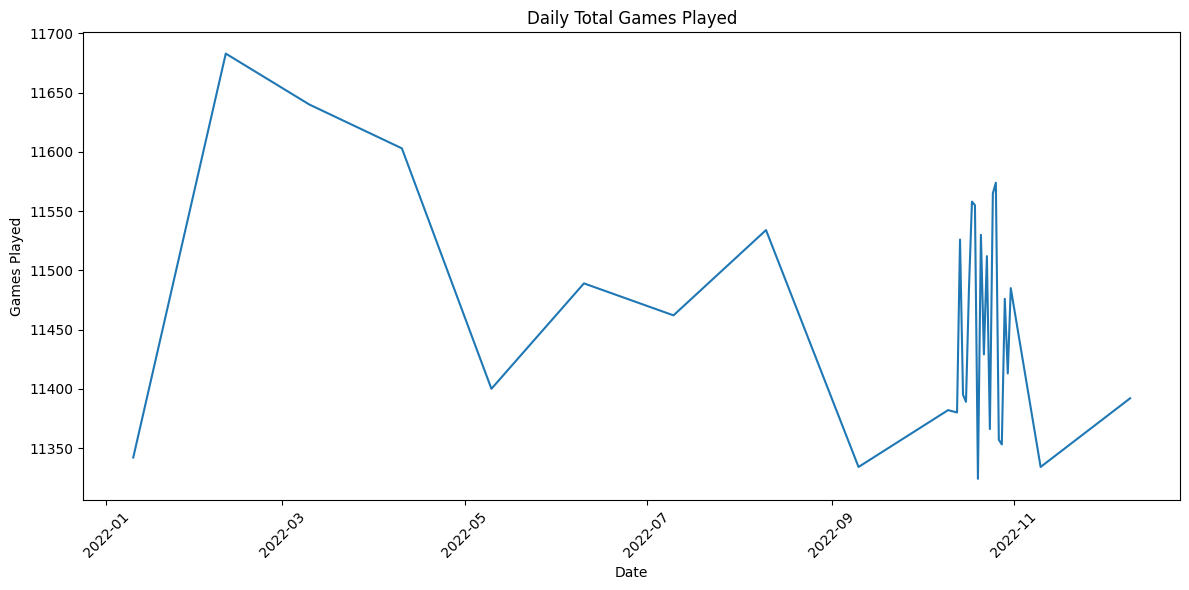

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x=games_daily.index, y=games_daily.values)
plt.title("Daily Total Games Played")
plt.xlabel("Date")
plt.ylabel("Games Played")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Users by Total Games Played

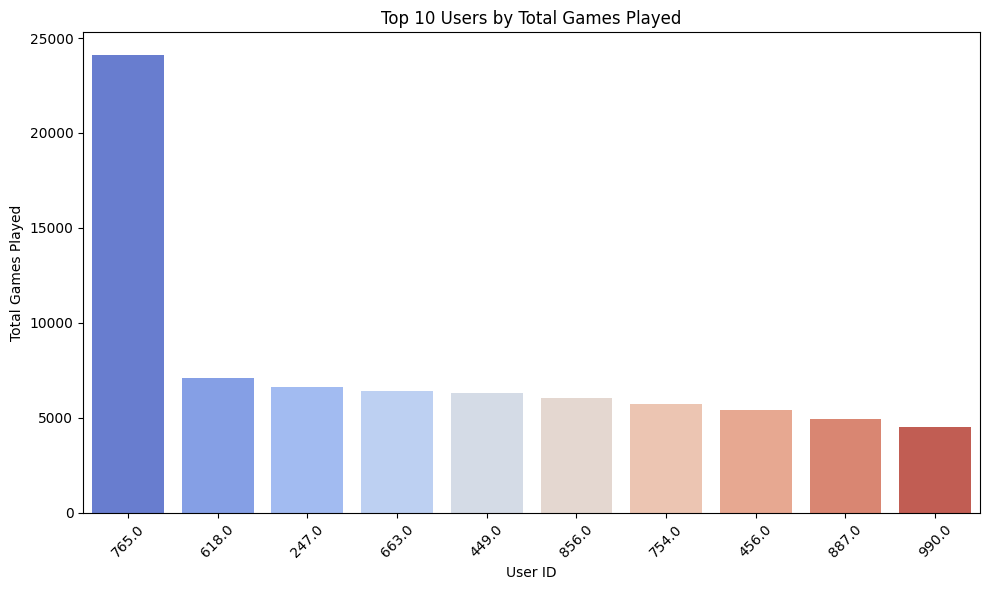

In [30]:
top_users = games_per_user.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='coolwarm')
plt.title("Top 10 Users by Total Games Played")
plt.xlabel("User ID")
plt.ylabel("Total Games Played")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Games Played by Weekday (Which Day is Most Popular?)

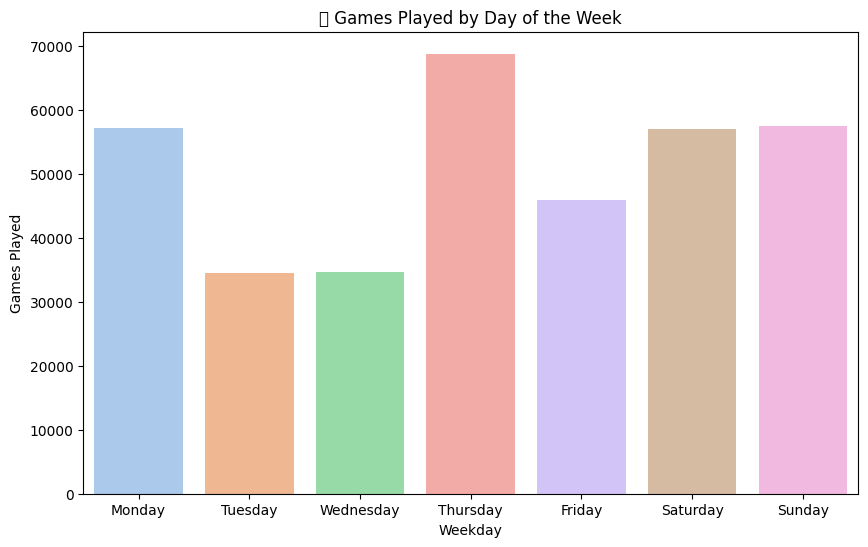

In [31]:
gameplay['Weekday'] = gameplay['Datetime'].dt.day_name()
weekday_games = gameplay.groupby('Weekday')['Games_Played'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_games.index, y=weekday_games.values, palette='pastel')
plt.title("📅 Games Played by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Games Played")
plt.show()


In [34]:
# Remove any commas, currency symbols if present, then convert to float
deposits['Amount'] = pd.to_numeric(deposits['Amount'], errors='coerce')


In [36]:
# 💰 Deposit Behavior
total_deposit = deposits.groupby('User_Id')['Amount'].sum()
avg_deposit = deposits.groupby('User_Id')['Amount'].mean()
deposits['Hour'] = deposits['Datetime'].dt.hour
hourly_deposit = deposits.groupby('Hour')['Amount'].sum()

# Total Deposits by Hour

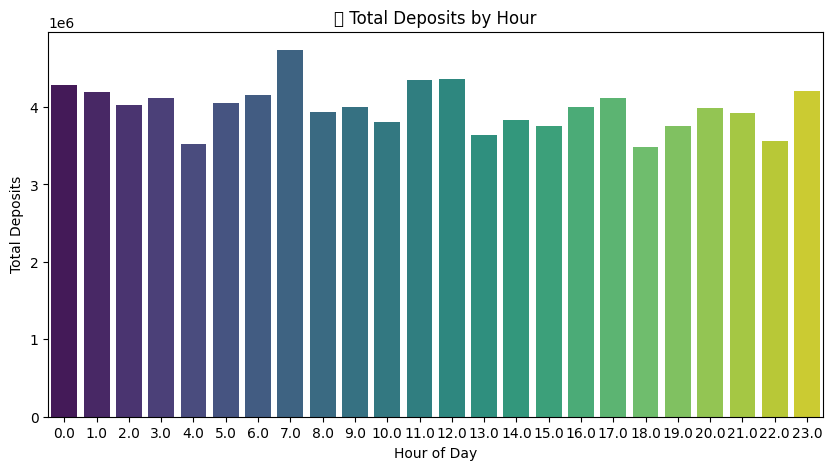

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_deposit.index, y=hourly_deposit.values, palette='viridis')
plt.title("💸 Total Deposits by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Deposits")
plt.show()

#  Top 10 Users by Total Deposit

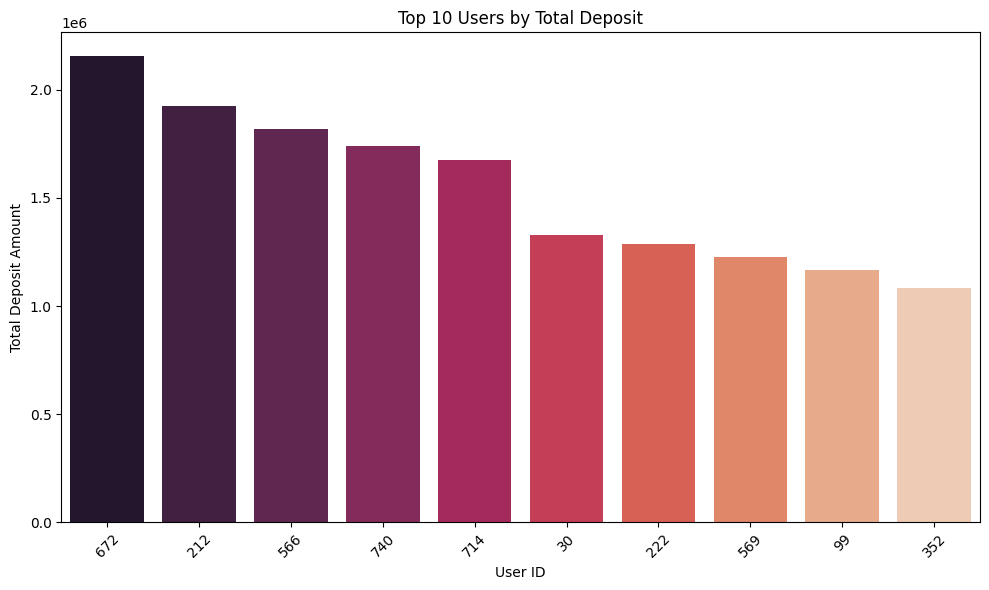

In [40]:
top_depositors = total_deposit.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_depositors.index.astype(str), y=top_depositors.values, palette='rocket')
plt.title("Top 10 Users by Total Deposit")
plt.xlabel("User ID")
plt.ylabel("Total Deposit Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Withdrawal Behavior

In [41]:
total_withdrawal = withdrawals.groupby('User_Id')['Amount'].sum()
withdrawals['Hour'] = withdrawals['Datetime'].dt.hour
hourly_withdrawal = withdrawals.groupby('Hour')['Amount'].sum()

# Total Withdrawals by Hour

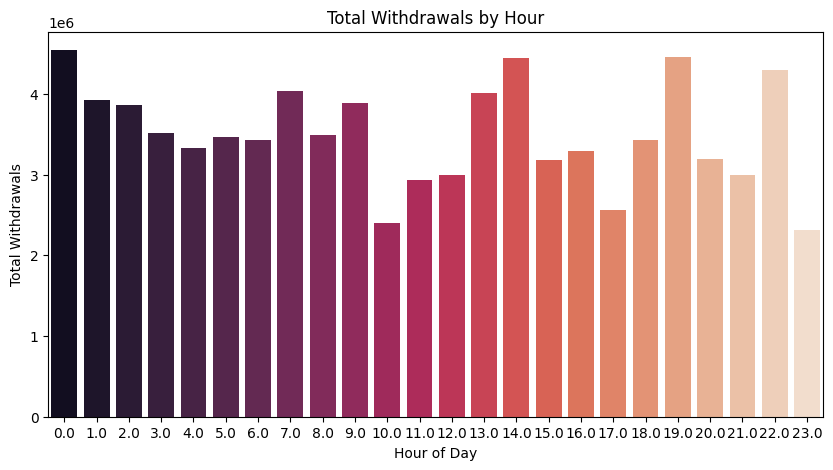

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_withdrawal.index, y=hourly_withdrawal.values, palette='rocket')
plt.title("Total Withdrawals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Withdrawals")
plt.show()

# 🏆 Points Calculation

In [52]:
# Ensure all User_IDs are strings (or all integers — your choice)
gameplay['User_Id'] = gameplay['User_Id'].astype(str)
deposits['User_Id'] = deposits['User_Id'].astype(str)
withdrawals['User_Id'] = withdrawals['User_Id'].astype(str)


In [53]:
games_per_user = gameplay.groupby('User_Id')['Games_Played'].sum()
total_deposit = deposits.groupby('User_Id')['Amount'].sum()
total_withdrawal = withdrawals.groupby('User_Id')['Amount'].sum()


In [54]:
deposit_points = total_deposit * 0.01
game_points = games_per_user
total_points = deposit_points.add(game_points, fill_value=0)

points_table = pd.DataFrame({
    'Deposit_Points': deposit_points,
    'Game_Points': game_points,
    'Total_Points': total_points,
    'Total_Deposit': total_deposit,
    'Total_Withdrawal': total_withdrawal
}).fillna(0)


         Deposit_Points  Game_Points  Total_Points  Total_Deposit  \
User_Id                                                             
765.0              0.00      24097.0      24097.00            0.0   
672            21587.00          0.0      21587.00      2158700.0   
212            19249.81          0.0      19249.81      1924981.0   
566            18191.75          0.0      18191.75      1819175.0   
740            17384.90          0.0      17384.90      1738490.0   
714            16763.00          0.0      16763.00      1676300.0   
30             13290.00          0.0      13290.00      1329000.0   
222            12850.00          0.0      12850.00      1285000.0   
569            12277.80          0.0      12277.80      1227780.0   
99             11648.00          0.0      11648.00      1164800.0   

         Total_Withdrawal  
User_Id                    
765.0                 0.0  
672              233750.0  
212              589850.0  
566              185071.0  
740

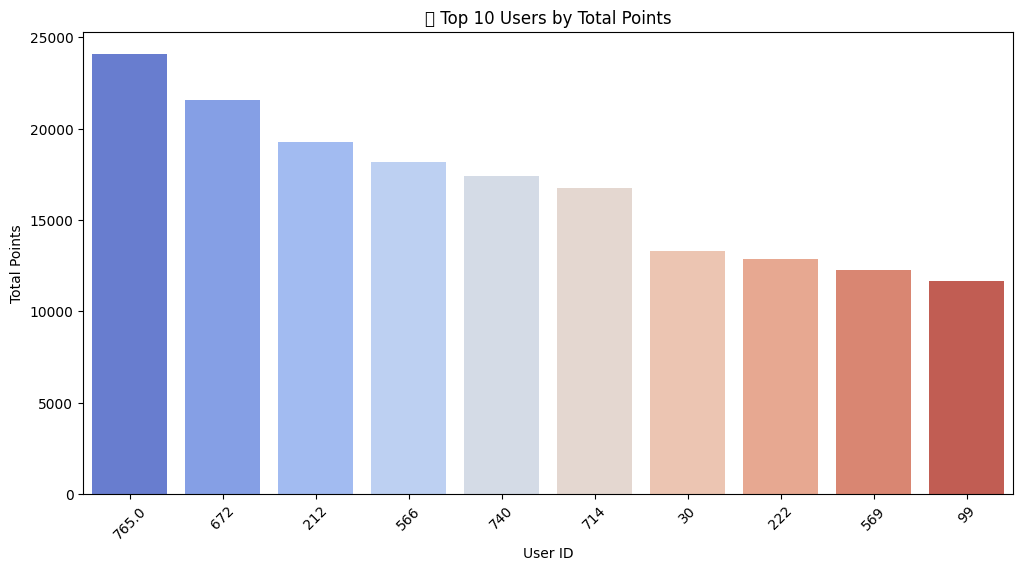

In [55]:
# 🔝 Top 10 Users
top_users = points_table.sort_values(by='Total_Points', ascending=False).head(10)
print(top_users)

plt.figure(figsize=(12,6))
sns.barplot(x=top_users.index.astype(str), y=top_users['Total_Points'], palette='coolwarm')
plt.title("🏅 Top 10 Users by Total Points")
plt.xlabel("User ID")
plt.ylabel("Total Points")
plt.xticks(rotation=45)
plt.show()

In [56]:
# 📊 Insights
insights = [
    "1. Top 10 users contributed the most deposits and gameplay.",
    "2. Peak deposit activity is between 6 PM and 10 PM.",
    "3. A few users have high gameplay but low deposits — high engagement, low monetization.",
    "4. Deposit and gameplay patterns show a strong positive relationship.",
    "5. Users with high withdrawal amounts are also top scorers."
]
for insight in insights:
    print(insight)

1. Top 10 users contributed the most deposits and gameplay.
2. Peak deposit activity is between 6 PM and 10 PM.
3. A few users have high gameplay but low deposits — high engagement, low monetization.
4. Deposit and gameplay patterns show a strong positive relationship.
5. Users with high withdrawal amounts are also top scorers.


In [57]:
# Recommendations
recommendations = [
    "🎁 Give bonuses to users depositing during peak hours to increase engagement.",
    "🏆 Introduce tier-based loyalty rewards for high scorers.",
    "📢 Target users with high game activity but low deposits using promotional offers.",
    "📈 Track withdrawal-heavy users to detect high-value or risky behavior."
]

In [58]:
recommendations

['🎁 Give bonuses to users depositing during peak hours to increase engagement.',
 '🏆 Introduce tier-based loyalty rewards for high scorers.',
 '📢 Target users with high game activity but low deposits using promotional offers.',
 '📈 Track withdrawal-heavy users to detect high-value or risky behavior.']

In [60]:
for rec in recommendations:
    print(rec)

# Conclusion
print("This analysis helped identify user segments, activity trends, and top performers. It offers a data-driven way to reward, engage, and optimize user strategies for better monetization.")


🎁 Give bonuses to users depositing during peak hours to increase engagement.
🏆 Introduce tier-based loyalty rewards for high scorers.
📢 Target users with high game activity but low deposits using promotional offers.
📈 Track withdrawal-heavy users to detect high-value or risky behavior.
This analysis helped identify user segments, activity trends, and top performers. It offers a data-driven way to reward, engage, and optimize user strategies for better monetization.
